In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from typing import List

In [2]:
def spline(x: List[float], y: List[float], smoothing_factor: float=None):
    spl = UnivariateSpline(x, y)
    if smoothing_factor is not None:
        spl.set_smoothing_factor(smoothing_factor)
    xs = np.linspace(-3, 3, 1000)
    return spl

# spl = spline(x, y, 0.5)
# ys = spl(xs)

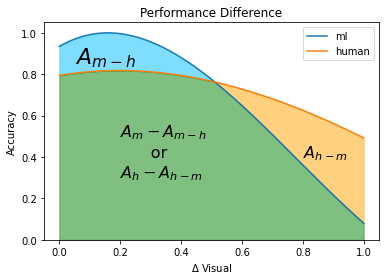

In [57]:
ml_y = [0.95, 0.95, 0.90, 0.70, 0.30, 0.10]
ml_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
human_y = [0.80, 0.80, 0.80, 0.75, 0.60, 0.50]
human_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
ml_spl = spline(ml_x, ml_y)
human_spl = spline(human_x, human_y)
x = np.linspace(0, 100, 10000) / 100
fig = plt.figure()
# fig.tight_layout() 
# ax = plt.subplot()
plt.ylim(0, 1.05)
ml_pred = ml_spl(x)
human_pred = human_spl(x)
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('Performance Difference')
plt.legend()
plt.fill_between(x, ml_pred, human_pred, where=(human_pred > ml_pred), interpolate=True, alpha=0.5, color="orange")
plt.fill_between(x, ml_pred, human_pred, where=(human_pred < ml_pred), interpolate=True, alpha=0.5, color="deepskyblue")

min_curve = np.minimum(ml_pred, human_pred)
plt.fill_between(x, min_curve, 0, where=(min_curve > 0), interpolate=True, alpha=0.5, color="green")


plt.text(0.05, 0.85, '$A_{m-h}$', fontsize=22)
plt.text(0.80, 0.40, '$A_{h-m}$', fontsize=16)
plt.text(0.20, 0.30, '$A_h - A_{h-m}$', fontsize=16)
plt.text(0.20, 0.40, '      or', fontsize=16)
plt.text(0.20, 0.50, '$A_m - A_{m-h}$', fontsize=16)
plt.ylabel('Accuracy')
plt.xlabel('$\Delta$ Visual')
plt.savefig('x.png')

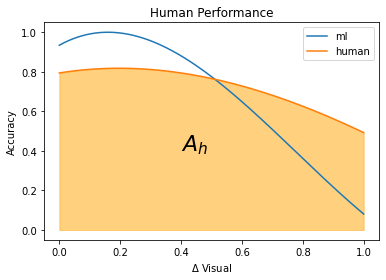

In [48]:
fig = plt.figure()
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('Human Performance')
plt.legend()
plt.fill_between(x, human_pred, 0, where=(human_pred > 0), interpolate=True, alpha=0.5, color='orange')
plt.text(0.40, 0.40, '$A_h$', fontsize=22)
plt.xlabel('$\Delta$ Visual')
plt.ylabel('Accuracy')
fig.savefig("x.png")

Text(0, 0.5, 'Accuracy')

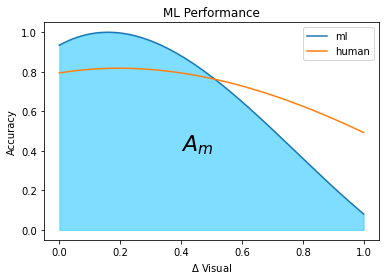

In [59]:
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('ML Performance')
plt.legend()
plt.fill_between(x, ml_pred, 0, where=(ml_pred > 0), interpolate=True, alpha=0.5, color="deepskyblue")
plt.text(0.40, 0.40, '$A_m$', fontsize=22)
plt.xlabel('$\Delta$ Visual')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

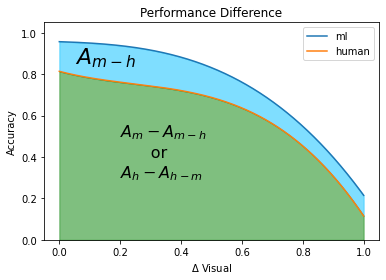

In [63]:
ml_y = [0.95, 0.95, 0.90, 0.70, 0.60, 0.20]
ml_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
human_y = [0.80, 0.80, 0.70, 0.60, 0.50, 0.10]
human_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
ml_spl = spline(ml_x, ml_y)
human_spl = spline(human_x, human_y)
x = np.linspace(0, 100, 10000) / 100

plt.ylim(0, 1.05)
ml_pred = ml_spl(x)
human_pred = human_spl(x)
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('Performance Difference')
plt.legend()
# plt.fill_between(x, ml_pred, human_pred, where=(human_pred > ml_pred), interpolate=True, alpha=0.5)
plt.fill_between(x, ml_pred, human_pred, where=(human_pred < ml_pred), interpolate=True, alpha=0.5, color="deepskyblue")

min_curve = np.minimum(ml_pred, human_pred)
plt.fill_between(x, min_curve, 0, where=(min_curve > 0), interpolate=True, alpha=0.5, color="green")


plt.text(0.05, 0.85, '$A_{m-h}$', fontsize=22)
# plt.text(80, 40, '$A_{h-m}$', fontsize=16)
plt.text(0.20, 0.30, '$A_h - A_{h-m}$', fontsize=16)
plt.text(0.20, 0.40, '      or', fontsize=16)
plt.text(0.20, 0.50, '$A_m - A_{m-h}$', fontsize=16)
plt.xlabel('$\Delta$ Visual')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

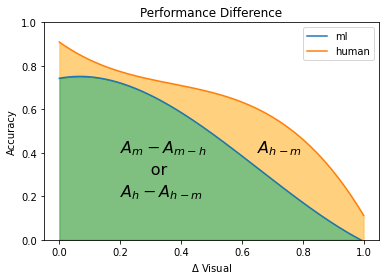

In [65]:
ml_y = [0.75, 0.70, 0.60, 0.40, 0.15, 0]
ml_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
human_y = [0.90, 0.80, 0.70, 0.60, 0.50, 0.10]
human_x = [0.0, 0.20, 0.40, 0.60, 0.80, 1.00]
ml_spl = spline(ml_x, ml_y)
human_spl = spline(human_x, human_y)
x = np.linspace(0, 100, 10000) / 100

plt.ylim(0, 1.00)
ml_pred = ml_spl(x)
human_pred = human_spl(x)
plt.plot(x, ml_pred, label='ml')
plt.plot(x, human_pred, label='human')
plt.title('Performance Difference')
plt.legend()
plt.fill_between(x, ml_pred, human_pred, where=(human_pred > ml_pred), interpolate=True, alpha=0.5, color="orange")
# plt.fill_between(x, ml_pred, human_pred, where=(human_pred < ml_pred), interpolate=True, alpha=0.5)

min_curve = np.minimum(ml_pred, human_pred)
plt.fill_between(x, min_curve, 0, where=(min_curve > 0), interpolate=True, alpha=0.5, color="green")


# plt.text(5, 85, '$A_{m-h}$', fontsize=22)
plt.text(0.65, 0.40, '$A_{h-m}$', fontsize=16)
plt.text(0.20, 0.20, '$A_h - A_{h-m}$', fontsize=16)
plt.text(0.20, 0.30, '      or', fontsize=16)
plt.text(0.20, 0.40, '$A_m - A_{m-h}$', fontsize=16)
plt.xlabel('$\Delta$ Visual')
plt.ylabel('Accuracy')